---
title: "Quick introduction to deep learning"
author: Boxiang Liu, modified by Haky Im
date: 2022-03-23
date-modified: last-modified
categories:
  - gene46100
  - notebook
execute:
  eval: false
---



# Learning objectives



1. Understand and implement gradient descent to fit a linear model

2. Build and train a multi-layer perceptron (MLP) using PyTorch

3. Learn the basics of PyTorch, including model definition, forward pass, and optimization


### Install and load some packages
We'll start by making sure we have all the required Python packages installed and ready to go. PyTorch is the main library we’ll use for deep learning.

In [2]:
## install packages if needed
if False:
    %pip install scikit-learn plotnine tqdm pandas

In [1]:
from sklearn.datasets import make_regression
import numpy as np
from numpy.linalg import inv
from plotnine import qplot, ggplot, geom_point, geom_line, aes, geom_abline
from plotnine.themes import theme_bw
from plotnine.geoms import annotate

# 1. Fit a linear model with gradient descent

The linear model is the most commonly used model for regression problems. They follow this form:

$y = X\beta + \epsilon$

where $\epsilon \sim N(0, \sigma)$

Let's simulate some data and fit a linear model from scratch.

## Simulate linear data

We generate 1000 samples, each with 2 features. We'll define the "true" coefficients and add a bit of noise to make it realistic.

- x: predictors/features (shape: 1000×2)
- y: response variable (shape: 1000×1)
- coef = [$\beta_1 \beta_2$]: the true coefficients used to generate $y$

In [2]:
np.random.seed(42)
bias = 0
noise = 10
x, y, coef = make_regression(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_targets=1,
    bias=bias,
    noise=noise,
    coef=True
    )

### show simulated x, y, and coef= [$\beta_1 \beta_2$]

In [18]:
print('x.shape:', x.shape)
print('y.shape:', y.shape)
print('coef.shape:', coef.shape)

x.shape: (1000, 2)
y.shape: (1000,)
coef.shape: (2,)


In [19]:
print('x:\n',x,'\n')
print('y[0:10]:\n',y[0:10],'\n')
print('coef:\n',coef,'\n')


x:
 [[-0.16711808  0.14671369]
 [-0.02090159  0.11732738]
 [ 0.15041891  0.364961  ]
 ...
 [ 0.30263547 -0.75427585]
 [ 0.38193545  0.43004165]
 [ 0.07736831 -0.8612842 ]] 

y[0:10]:
 [-14.99694989 -12.67808888  17.77545452   6.66146467 -14.19552996
 -25.24484815 -39.23162627 -52.01803821   5.76368853 -50.11860295] 

coef:
 [40.71064891  6.60098441] 



## Predict y with ground truth parameters
Since we know the true coefficients, we can directly compute the predicted y and visualize how well they fit.

In [3]:
y_hat = x.dot(coef) + bias

### compare $\hat{y}$ and $y$

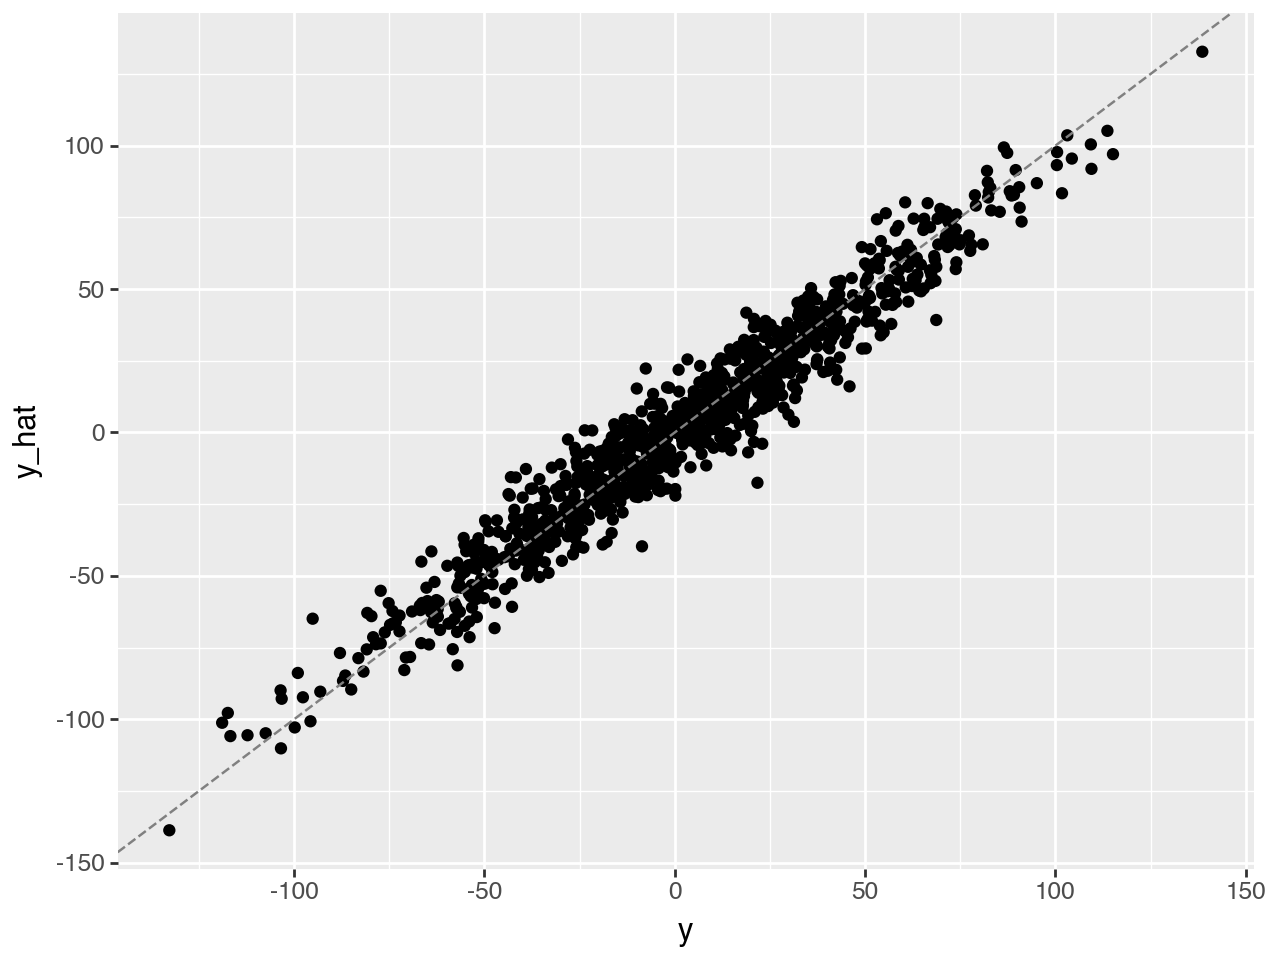

In [9]:
(qplot(x=y, y=y_hat, geom="point", xlab="y", ylab="y_hat") + geom_abline(intercept=0, slope=1, color='gray', linetype='dashed'))

## Compute analytical solution

For linear regression, there’s a closed-form solution known as the normal equation:

$\hat{\beta} = (X^T X)^{-1} X^T y$

This gives us the optimal coefficients that minimize mean square errors.

Let's get $\hat{\beta}$ and compare it with the ground truth.

# Exercise
Derive the normal equation from the model, using matrix algebra

In [4]:
var = x.transpose().dot(x)
cov = x.transpose().dot(y)
b_hat = inv(var).dot(cov)

In [5]:
print("Estimated")
print(b_hat)

print("Ground truth")
print(coef)

Estimated
[41.06972678  6.79965716]
Ground truth
[40.71064891  6.60098441]


### Result Comparison
Estimated coefficients using the normal equation are close to the true ones, despite noise. That’s a good sanity check.

# Exercise
- [ ] Plot the prediction with the analystical estimates vs the target $y$

## Define Stochastic Gradient Descent (SGD)

When analytical solutions aren't available (which is often), we rely on numerical optimization like gradient descent.

Although linear regression has analytical solutions, this is unfortunately not the case for many other models. We may need to resort to numerical approximations to find the optimal parameters. One of the most popular numerical optimizers is called stochastic gradient descent.


## What is a Gradient?

A gradient is the derivative of a function, and it tells us how to adjust parameters to reduce the error.


$f'(\beta) = \lim_{\Delta\beta → 0} \frac{f(\beta + \Delta\beta) - f(\beta)}{\Delta\beta} = \frac{\partial f(\beta)}{\partial \beta} $

## What is Gradient Descent?

An optimization algorithm that iteratively updates parameters in the direction of steepest descent (negative gradient) to minimize a loss function.

- Learning rate ($\alpha$): step size. It is a hyperparameters that determines how fast we move in the direction of the gradient.
- Loss surface: the landscape we are optimizing over


At a particular $β_i$, we find the gradient $f'(\beta)$, and take a step along the direction of the gradient to find the next point $\beta_{i+1}$.

$\beta_{i+1} = \beta_i - \alpha f'(\beta_i)$

The $\alpha$ is called the learning rate. 

![gradient descent](assets/grad-desc.sRB3x.png)


## What is stochastic gradient descent?

In real-world applications, the size of our dataset is so large that it is impossible to calculate the gradient using all data points. Therefore, we take a small chunk (called a "batch") of the dataset to calcalate the gradient. This approximates the full-data gradients, thus the word stochastic.



## Three Components of Machine Learning

To build a machine learning model, we need:

- Model: Defines the hypothesis space (e.g., linear model)
- Loss Function: Measures how well the model fits
- Optimizer: Updates parameters to reduce the loss (e.g., SGD)


## Define the Loss Function

Common choice for regression: Mean Squared Error (MSE)

$\ell(\beta) = \frac{1}{2}\sum\limits_{i=1}^m (f(\beta)^{i} - y^{i})^2 / m$





## Compute the gradient


$\frac{\partial}{\partial \beta_j}\ell(\beta) = \frac{\partial}{\partial \beta_j} \frac{1}{2} \sum_i (f(\beta)^i - y^i)^2 =  \sum_i (f(\beta)^i - y^i) x_j$

Recall that in our example  $ f(\beta) = \hat{y}=  \beta_1 x_1 + \beta_2 x_2$. Here $\beta_j$ is either $\beta_1$ or $\beta_2$.

# Exercise
Show that the derivative of the loss function is as stated above.

## Optimize: estimate parameters with gradient descent

In [11]:
lr = 0.1 # learning rate
b = [0.0, 0.0] # initialize all betas to 0
n_examples = len(y)
trajectory = [b]

for _ in range(50): # 50 steps
  diff = x.dot(b) - y
  grad = diff.dot(x) / n_examples
  b -= lr*grad
  trajectory.append(b.copy())

trajectory = np.stack(trajectory, axis=1)

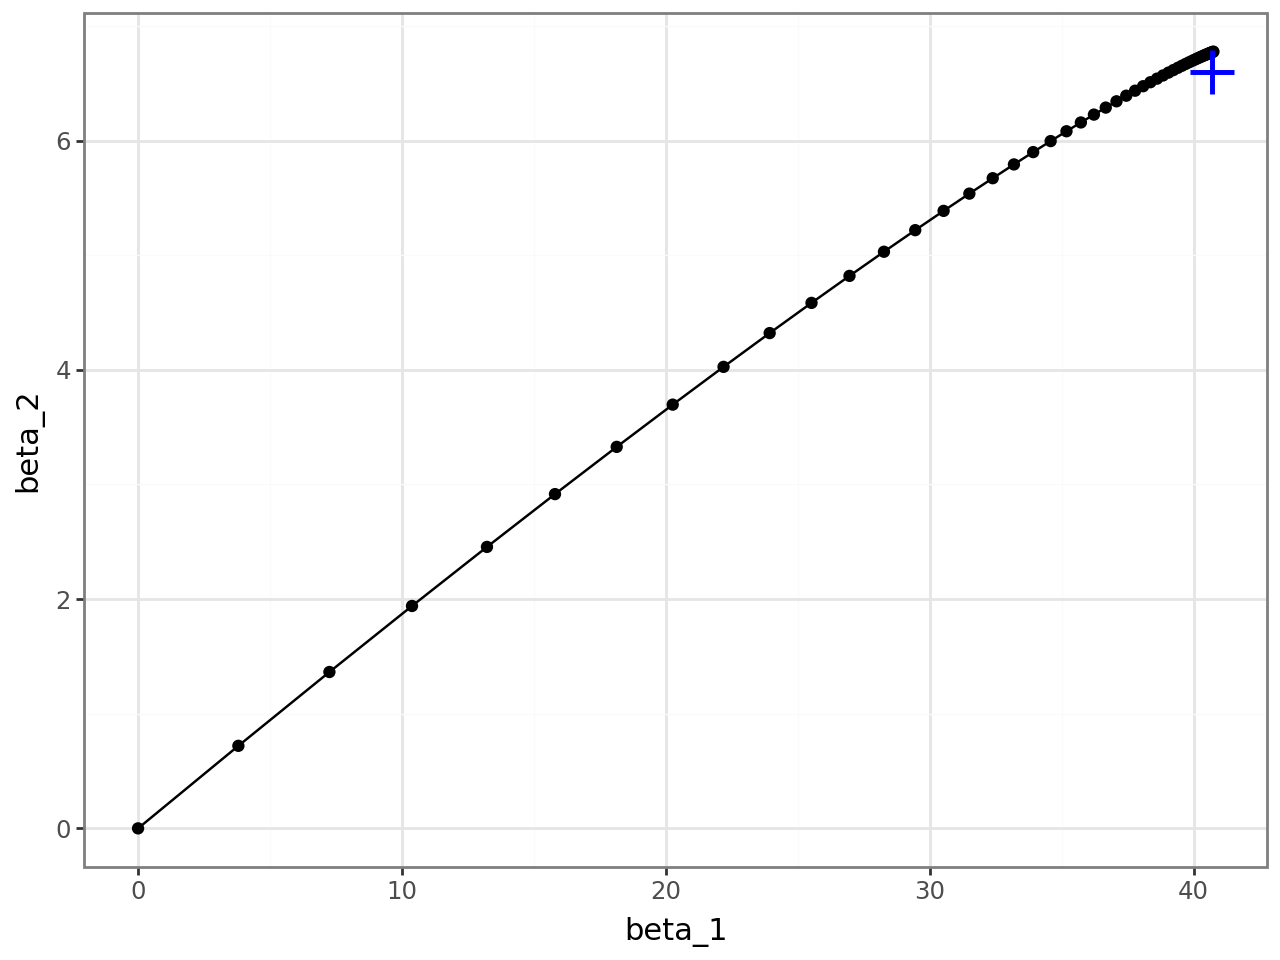

In [12]:
qplot(x=trajectory[0], y=trajectory[1], xlab="beta_1", ylab="beta_2", geom=["point", "line"]) + theme_bw() + annotate(geom="point", x=coef[0], y=coef[1], size=8, color="blue",shape='+',stroke=1)

# Exercise

- [ ] Add to the plot the normal equation estimates (traditional linear regression) of the coefficients in a different green

# Exercise

- [ ] Simulate $y$ with larger noise, estimate the regression coefficients using the normal equation and the gradient descent method, and plot the trajectory, the ground truth, and the two estimates for comparison.

# Summary of section

In this section, we learned

1. The linear model
2. The normal equation
3. Stochastic gradient descent

# Motivate utility of multi-layer perceptrons

# Fit linear model to nonlinear data

## Simulate non linear data
Let's start by simulating data according to the generative model:

$ y = x_1^3$


In [12]:
x = np.random.normal(size=1000)
y = x ** 3

## Predict with simple linear model
Let's try to predict with a simple linear regression model

$ y = X \beta$

# Question
how many parameters do we need to estimate for this simple linear model?

In [13]:
lr = 0.1 # learning rate
b = 0.0 # initialize all betas to 0
n_examples = len(y)

for _ in range(50): # 50 steps
  diff = x.dot(b) - y
  grad = diff.dot(x) / n_examples
  b -= lr*grad

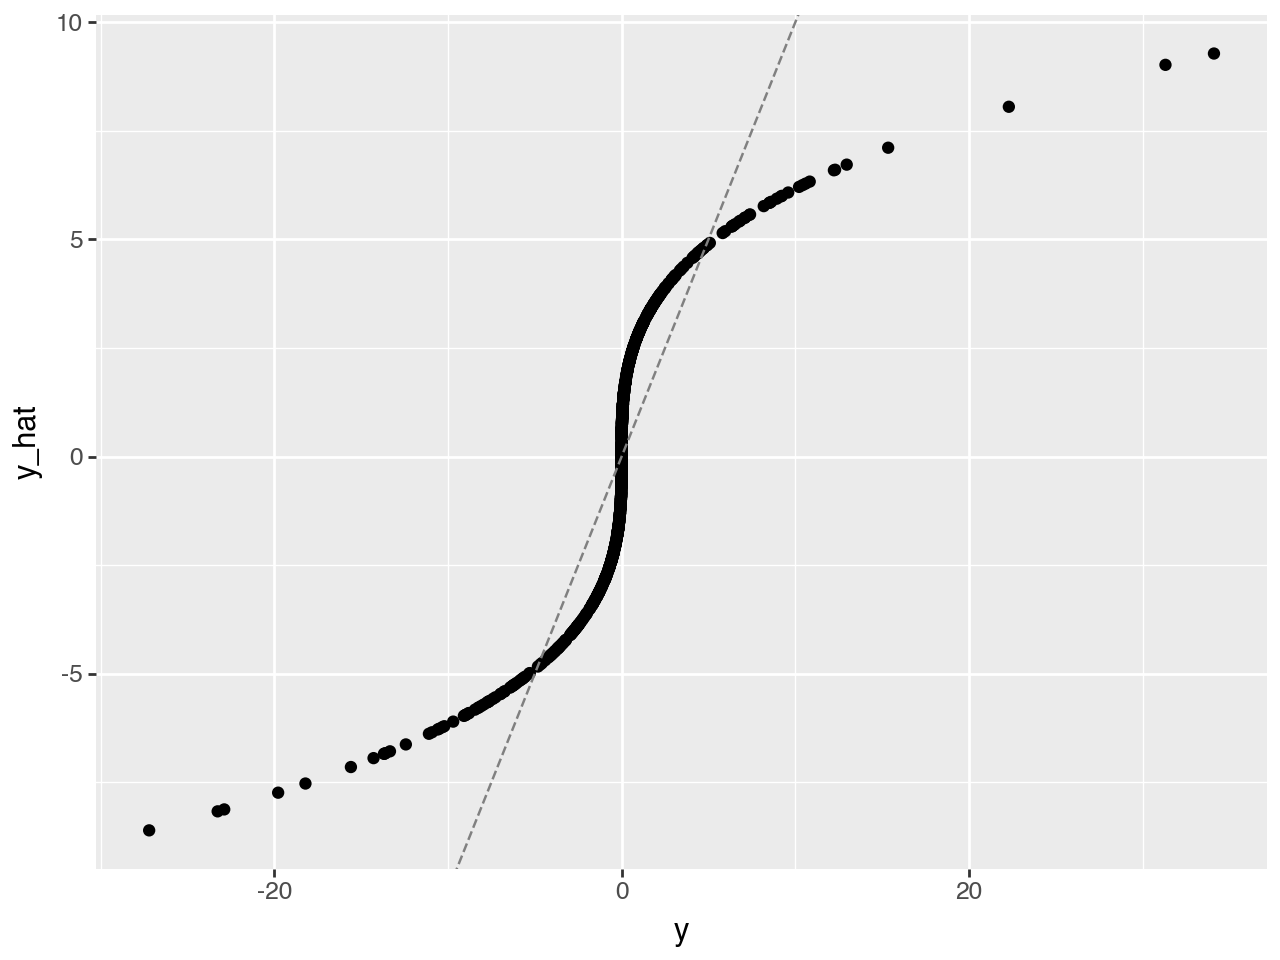

In [14]:
y_hat = x.dot(b)
( qplot(x = y, y=y_hat, geom="point", xlab="y", ylab="y_hat") +
geom_abline(intercept=0, slope=1, color='gray', linetype='dashed') )




We would like to be closer to the dashed gray, identity line! Let's try MLP.


# Define Multi-layer perceptron (MLP)


![MLP](https://www.allaboutcircuits.com/uploads/articles/an-introduction-to-training-theory-for-neural-networks_rk_aac_image2.jpg)

Multi-Layer Perceptron (MLP) is a type of artificial neural network that consists of:

- An input layer (in your case, 2-dimensional input)
- One or more hidden layers (in your case, one hidden layer)
- An output layer (in your case, 1-dimensional output)

y = W₂(\Phi(W₁x + b₁)) + b₂

# Exercise
Consider the MLP shown in the figure with:

- Input layer: 2 dimensions
- Hidden layer: 3 nodes
- Output layer: 1 dimension

Calculate the total number of parameters in this network by:

1. Counting the weights and biases between the input and hidden layer
2. Counting the weights and biases between the hidden and output layer
3. Adding these numbers together

Hint: Remember that each connection between layers has a weight, and each node (except input nodes) has a bias term. 

**Manually calculating gradients and updating the parameters becomes tedious, so we use Pytorch**

# Why PyTorch?

While we could manually implement gradient descent and backpropagation for our MLP, this would be:

- Time-consuming and error-prone
- Limited to simple architectures
- Difficult to maintain and modify

PyTorch solves these challenges by providing:

- Automatic differentiation (computes gradients automatically)
- GPU acceleration for faster training
- A rich ecosystem of pre-built layers and optimizers
- Dynamic computational graphs that make debugging easier
- Industry-standard tools used in both research and production

In this section, we'll build a simple PyTorch model to predict y from x, demonstrating how these features make deep learning more accessible and efficient.
Let's start by defining our model architecture: a neural network with one hidden layer containing three nodes.

## Install packages if needed

In [16]:
## install packages if needed
if False:  # Change to True to run the commands
    %pip install tqdm
    %pip install torch
    %pip install torchvision torchmetrics

In [17]:
import torch
print(torch.__version__)
## if on a mac check if mps is available so you use gpu
## print(torch.backends.mps.is_available())

2.6.0


### Define a non linear MLP

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
#device = torch.device("cuda")
device = torch.device("mps") ## use this line instead of the one above withb cuda


class MLP(nn.Module):
  def __init__(self, input_dim, hid_dim, output_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, hid_dim)
    self.fc2 = nn.Linear(hid_dim, output_dim)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    y = self.fc2(x)

    return y.squeeze(1)

mlp = MLP(input_dim=1, hid_dim=1024, output_dim=1).to(device)


## train MLP model using pytorch

We are now ready to train our model. To understand how our model is doing, we record the loss vs step, which is called the **learning curve** in ML literature.

In [61]:
x_tensor = torch.Tensor(x).unsqueeze(1).to(device)
y_tensor = torch.Tensor(y).to(device)
learning_curve = []
for epoch in range(10000):
  optimizer.zero_grad()
  y_hat = mlp(x_tensor)
  loss = loss_fn(y_hat, y_tensor)
  learning_curve.append(loss.item())
  loss.backward()
  optimizer.step()


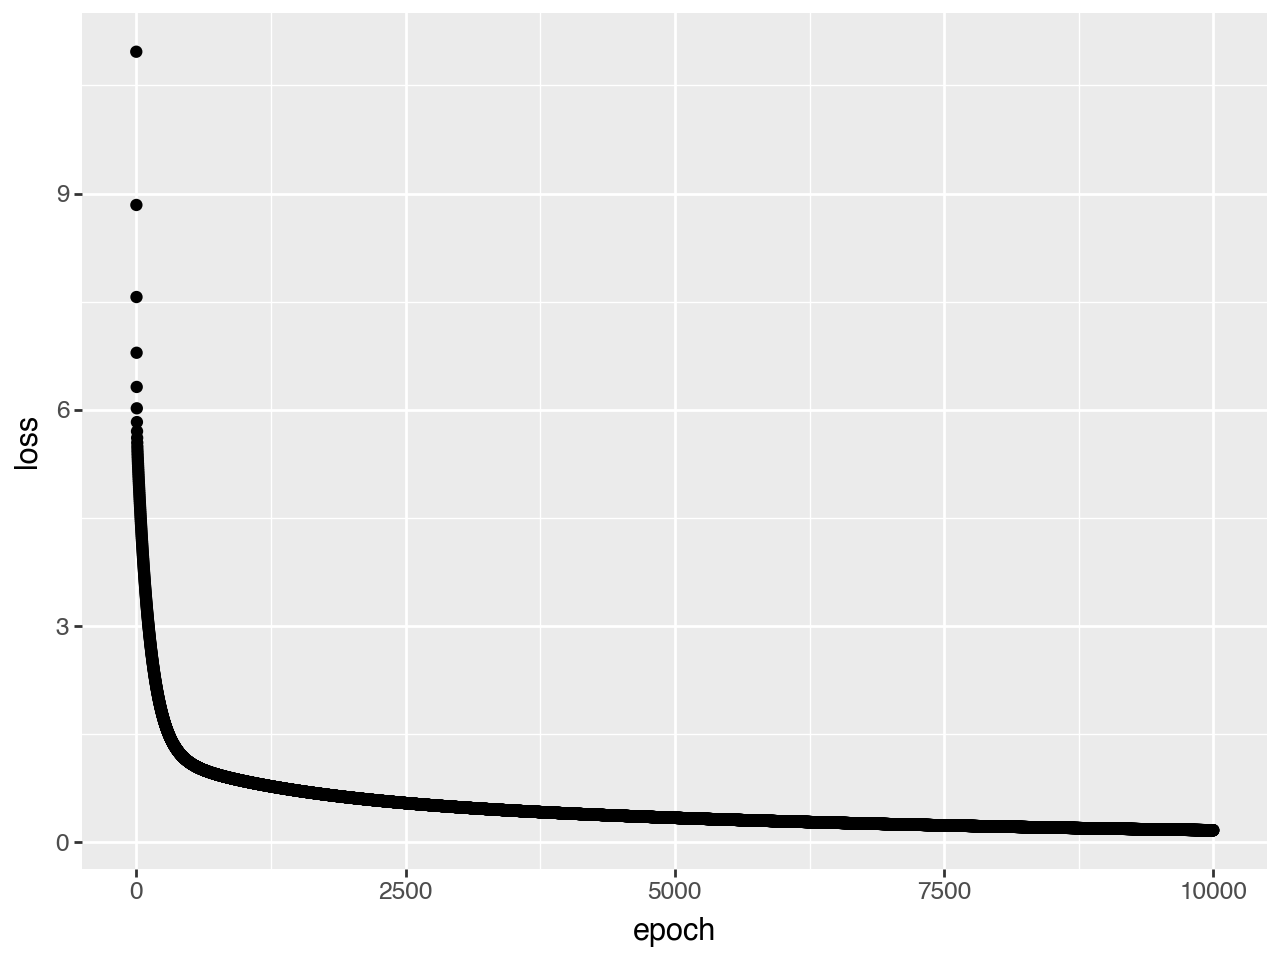

In [62]:
qplot(x=range(10000), y=learning_curve, xlab="epoch", ylab="loss")

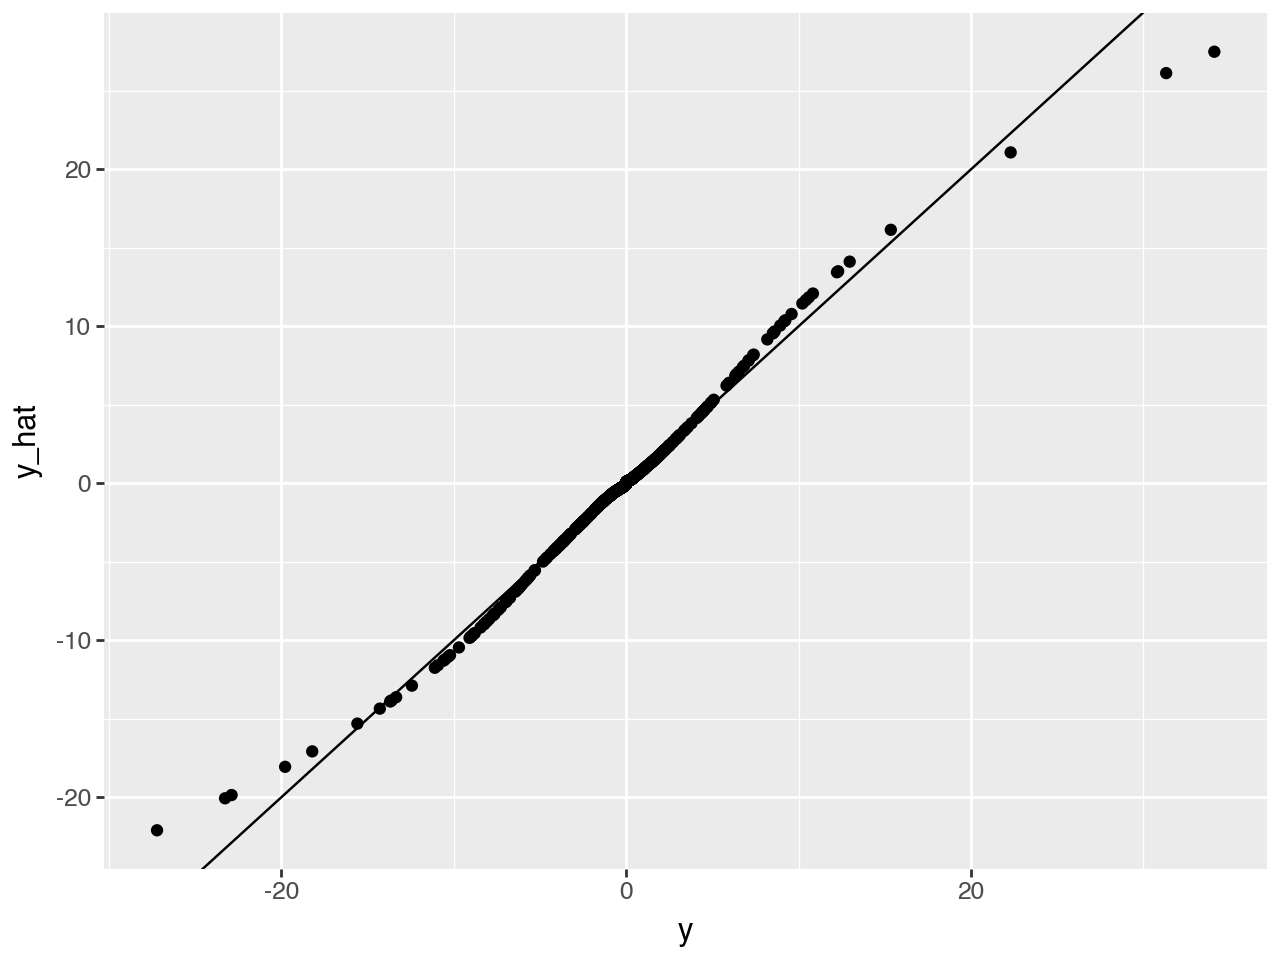

In [63]:
y_hat = mlp(x_tensor)
y_hat = y_hat.detach().cpu().numpy()
#qplot(x=y, y=y_hat, geom="point", xlab="y", ylab="y_hat")
qplot(x=y, y=y_hat, geom=["point", "abline"],
      xlab="y", ylab="y_hat",
      abline=dict(slope=1, intercept=0, color='red', linetype='dashed'))

Now this looks much better!

# Universal approximation theorem

The Universal Approximation Theorem states that a neural network with 1 hidden layer can approximate any continuous function for inputs within a specific range.

We won't go into details here but check out this post if you are interested: http://neuralnetworksanddeeplearning.com/chap4.html

# Summary

In this section, we learned the following things:

1. Multi-layer perceptrons
2. basic PyTorch
3. The universal approximation theorem